In [16]:
import geopandas as gpd
import pandas as pd
import psycopg2

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
pa = '/Users/apple/Desktop/mapdata/map4326.geojson'

In [3]:
df = gpd.read_file(pa)

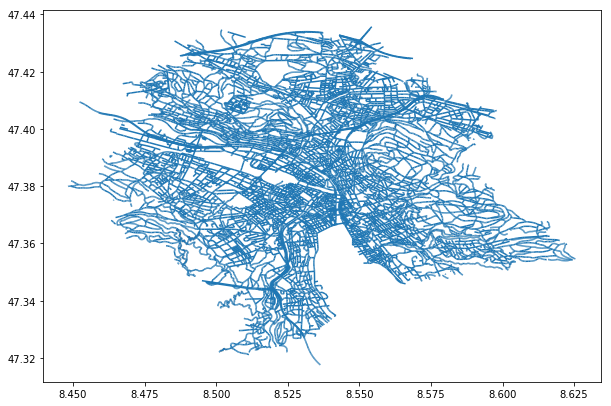

In [9]:
df.plot(figsize=(10, 10))

In [10]:
df = df.to_crs(epsg=3857)

In [26]:
import contextily as ctx

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))


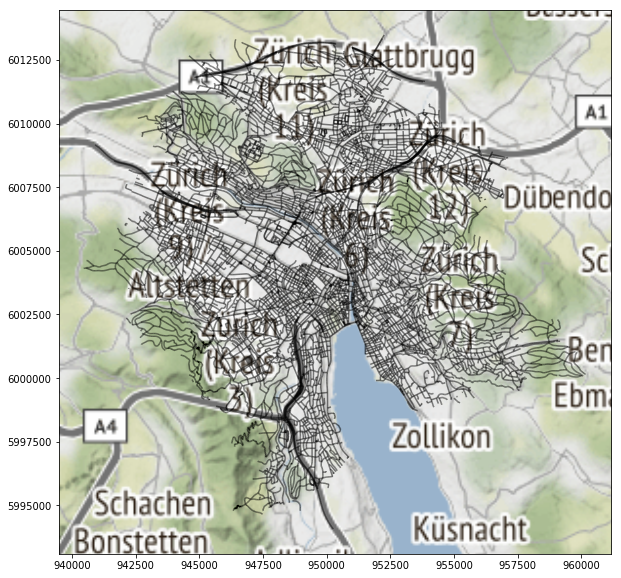

In [17]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=11)

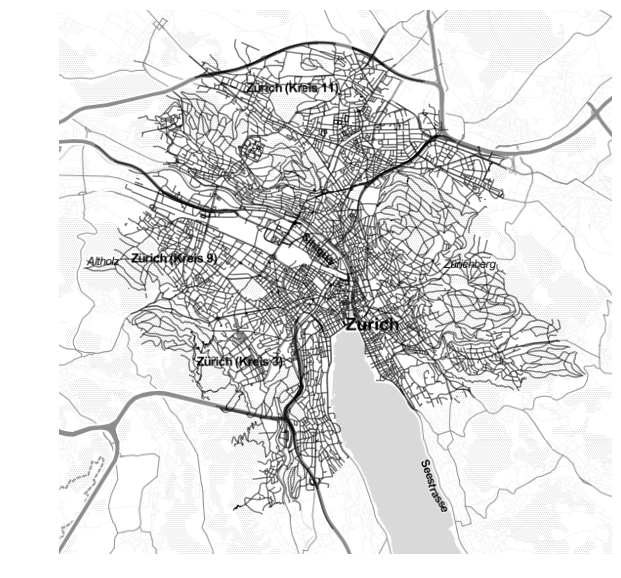

In [18]:
ax2 = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax2, zoom=12, url=ctx.sources.ST_TONER_LITE)
ax2.set_axis_off()

In [9]:
df['geometry'][0:3]

0    (LINESTRING (8.469252065874596 47.402943632767...
1    (LINESTRING (8.469547102980107 47.402773853415...
2    (LINESTRING (8.468851281272579 47.403163822370...
Name: geometry, dtype: object

In [11]:
df2=pd.DataFrame(df)

In [14]:
type(df2['geometry'][0])

shapely.geometry.multilinestring.MultiLineString

In [19]:
conn = psycopg2.connect(host="127.0.0.1",database="shared", user="jinzhang", password="94151q2w3e4r", port="5432")
cur = conn.cursor()

In [20]:
cur.execute("SELECT * FROM open_shapes.zurich_attr ORDER BY road_id ASC;")
rows=cur.fetchall()
conn.close()

In [22]:
bet=pd.DataFrame.from_records(rows,columns=['gid','betweenness'])

In [24]:
df['betweenness']=bet['betweenness']

In [25]:
df

GEMEINDENA  BFSNR GUELTIGKEI  GUELTIGERE     NUMMERIERU  \
0      Oberengstringen    245    gueltig    20080730  ungeradelinks   
1               Z�rich    261    gueltig    20110818   keineNummern   
2      Oberengstringen    245    gueltig    20080730  ungeradelinks   
3      Oberengstringen    245    gueltig    20080730  ungeradelinks   
4      Oberengstringen    245    gueltig    20080730  ungeradelinks   
5      Oberengstringen    245    gueltig    20080730  ungeradelinks   
6      Oberengstringen    245    gueltig    20080730  ungeradelinks   
7      Oberengstringen    245    gueltig    20080730  ungeradelinks   
8      Oberengstringen    245    gueltig    20080730  ungeradelinks   
9      Oberengstringen    245    gueltig    20080730  ungeradelinks   
10     Oberengstringen    245    gueltig    20080730  ungeradelinks   
11     Oberengstringen    245    gueltig    20080730  ungeradelinks   
12     Oberengstringen    245    gueltig    20080730  ungeradelinks   
13     Oberengstringen    245    gueltig    20080730  ungeradelinks   
14     Oberengstringen    245    gueltig    20080730  ungeradelinks   
15     Oberengstringen    245    gueltig    20080730  ungeradelinks   
16     Oberengstringen    245    gueltig    20080730  ungeradelinks   
17     Oberengstringen    245    gueltig    20080730  ungeradelinks   
18     Oberengstringen    245    gueltig    20080730  ungeradelinks   
19     Oberengstringen    245    gueltig    20080730  ungeradelinks   
20     Oberengstringen    245    gueltig    20080730  ungeradelinks   
21     Oberengstringen    245    gueltig    20080730  ungeradelinks   
22     Oberengstringen    245    gueltig    20080730  ungeradelinks   
23     Oberengstringen    245    gueltig    20080730  ungeradelinks   
24     Oberengstringen    245    gueltig    20080730  ungeradelinks   
25     Oberengstringen    245    gueltig    20080730  ungeradelinks   
26     Oberengstringen    245    gueltig    20080730  ungeradelinks   
27     Oberengstringen    245    gueltig    20080730  ungeradelinks   
28     Oberengstringen    245    gueltig    20080730  ungeradelinks   
29     Oberengstringen    245    gueltig    20080730  ungeradelinks   
...                ...    ...        ...         ...            ...   
90576           Z�rich    261    gueltig    20170503  ungeradelinks   
90577           Z�rich    261    gueltig    20170503  ungeradelinks   
90578           Z�rich    261    gueltig    20170503  ungeradelinks   
90579           Z�rich    261    gueltig    20170503  ungeradelinks   
90580           Z�rich    261    gueltig    20170503  ungeradelinks   
90581           Z�rich    261    gueltig    20170503  ungeradelinks   
90582           Z�rich    261    gueltig    20170503  ungeradelinks   
90583           Z�rich    261    gueltig    20170503  ungeradelinks   
90584           Z�rich    261    gueltig    20170503  ungeradelinks   
90585           Z�rich    261    gueltig    20170503  ungeradelinks   
90586           Z�rich    261    gueltig    20170503  ungeradelinks   
90587           Z�rich    261    gueltig    20170503  ungeradelinks   
90588           Z�rich    261    gueltig    20170503  ungeradelinks   
90589           Z�rich    261    gueltig    20170503  ungeradelinks   
90590           Z�rich    261    gueltig    20170503  ungeradelinks   
90591           Z�rich    261    gueltig    20170503  ungeradelinks   
90592           Z�rich    261    gueltig    20170503  ungeradelinks   
90593           Z�rich    261    gueltig    20170503  ungeradelinks   
90594           Z�rich    261    gueltig    20170503  ungeradelinks   
90595           Z�rich    261    gueltig    20170503  ungeradelinks   
90596           Z�rich    261    gueltig    20170503  ungeradelinks   
90597           Z�rich    261    gueltig    20170503  ungeradelinks   
90598           Z�rich    261    gueltig    20170503  ungeradelinks   
90599           Z�rich    261    gueltig    20170503  ungeradelinks   
90600           Z�rich    261    gue

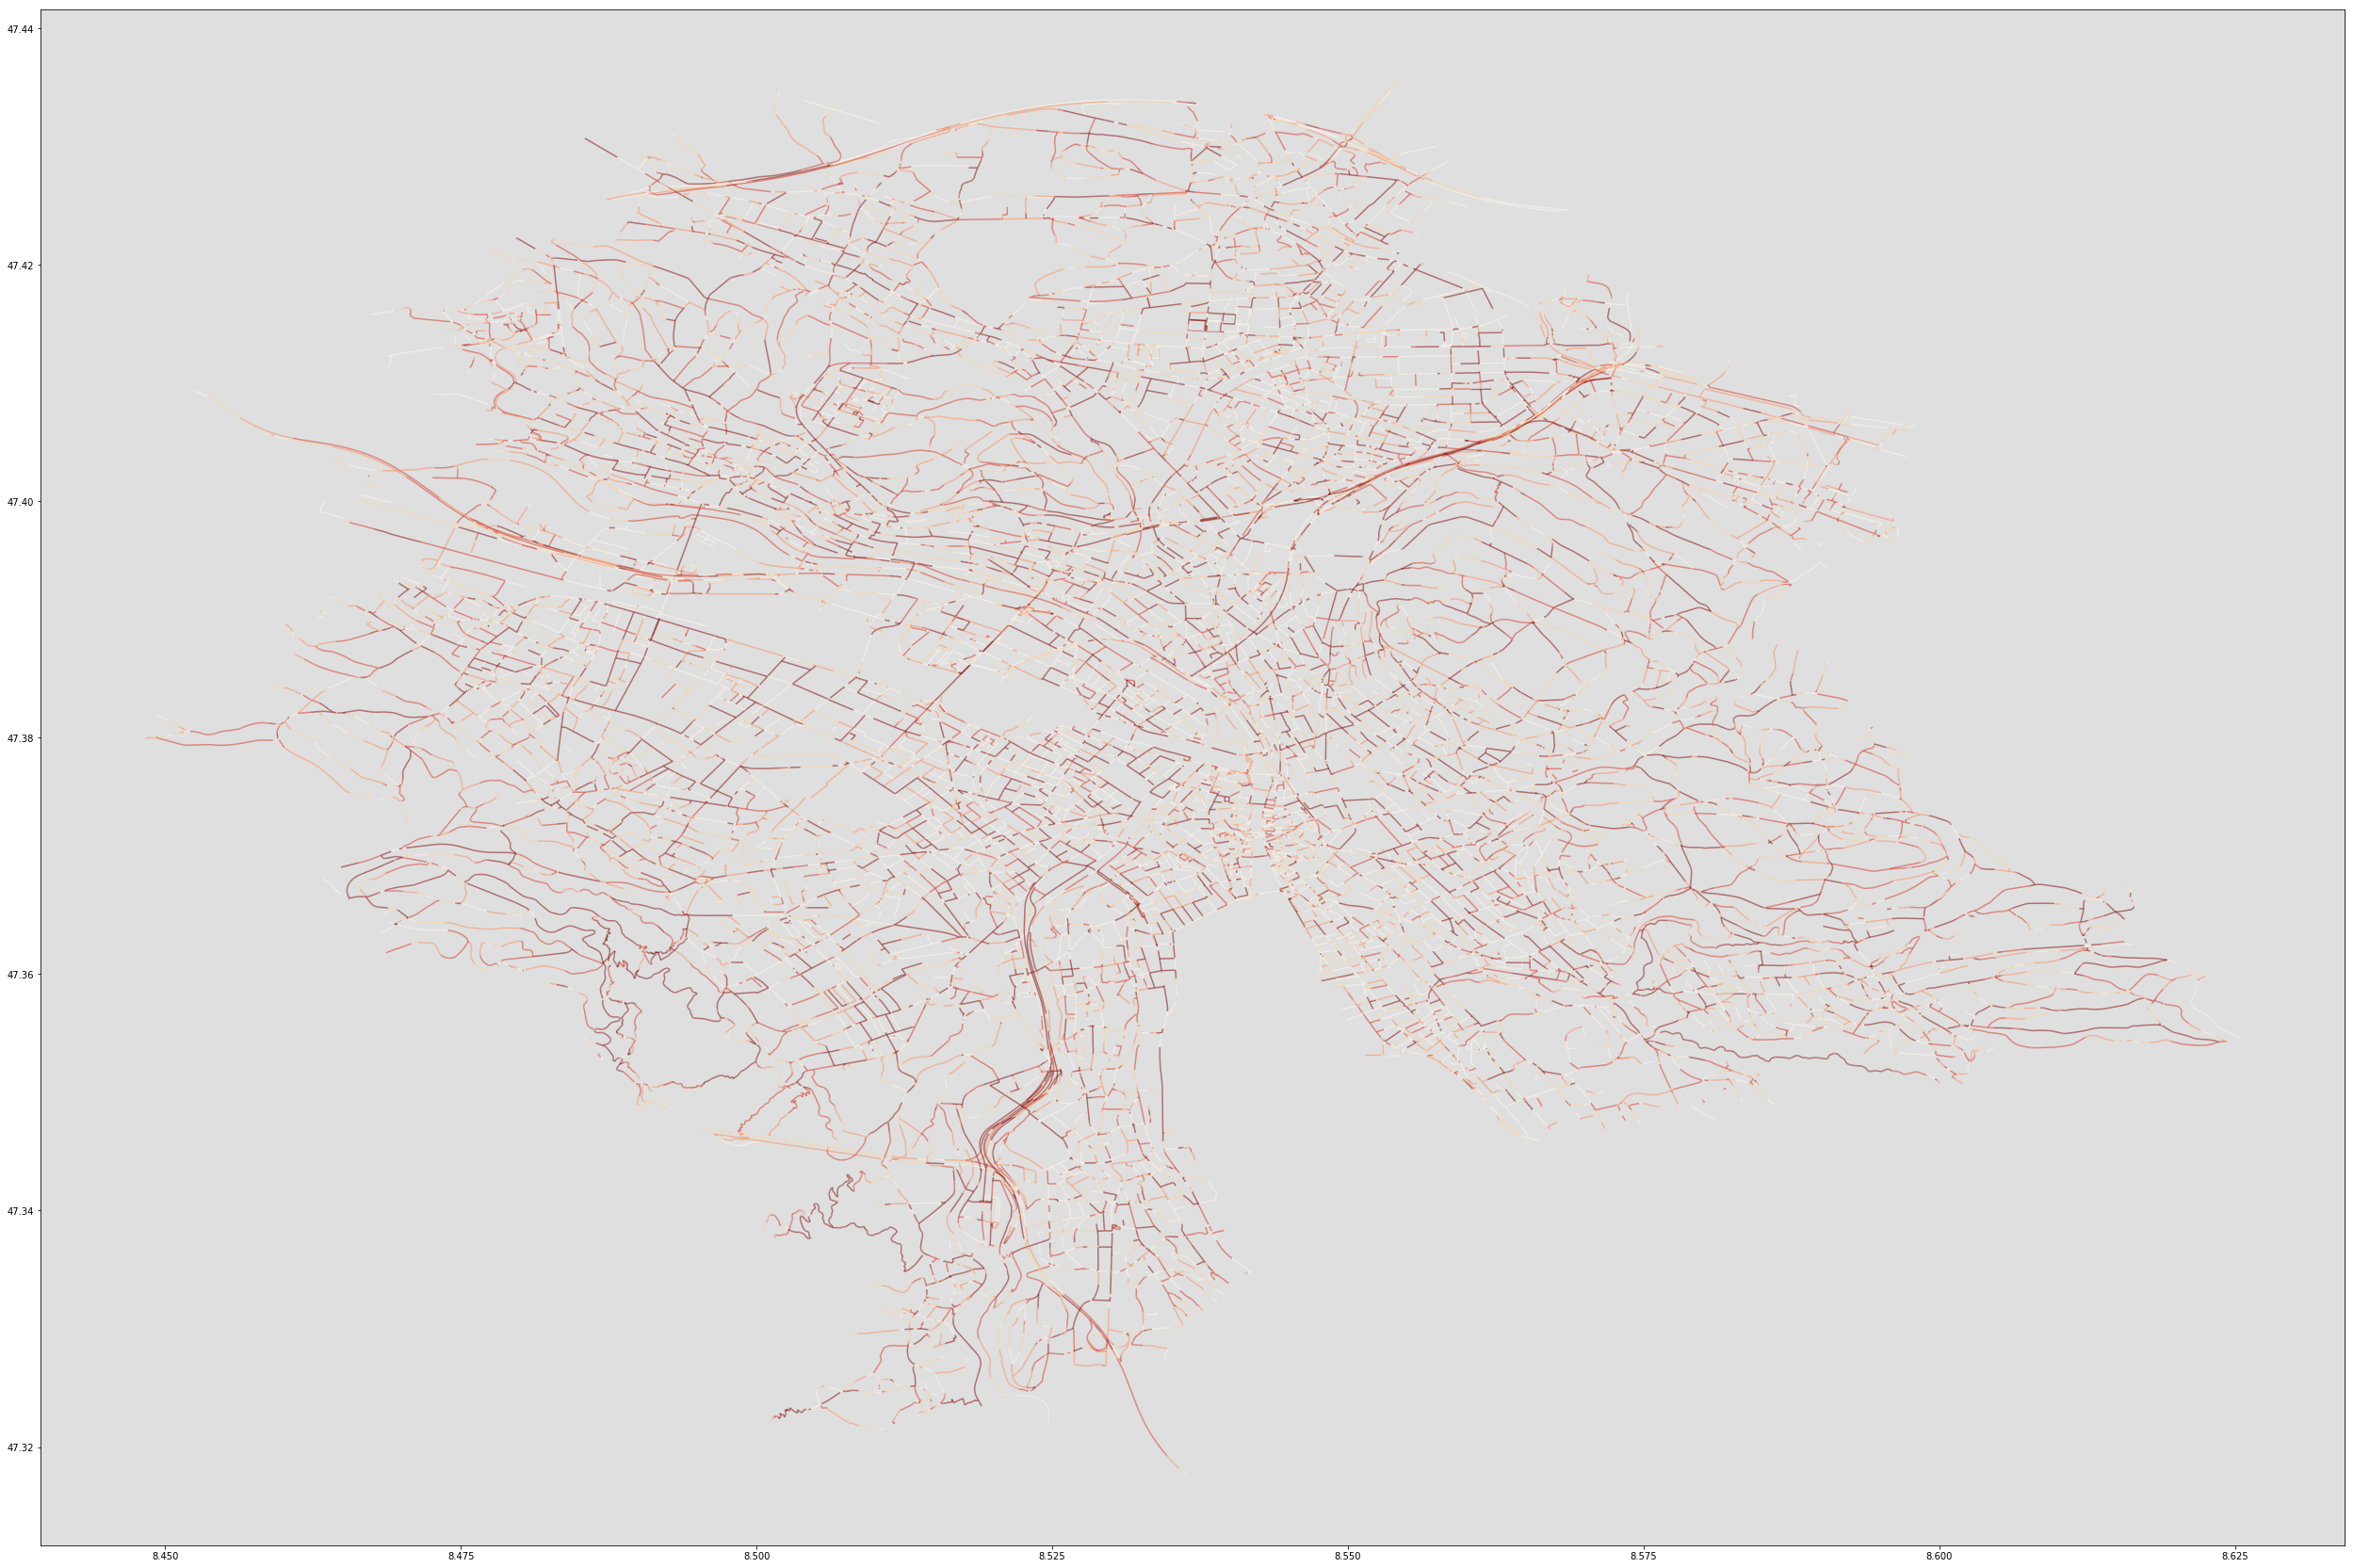

In [34]:
ax3 = df.plot(figsize=(50, 30), alpha=0.5, edgecolor='k',column='betweenness', cmap='OrRd', scheme='equal_interval')
add_basemap(ax3, zoom=12, url=ctx.sources.ST_TONER_LITE)
ax3